# LFD Take Home Final Part

**Muhammed Rüşen Birben 150220755**

## Creating And Plotting The Data

In [2]:
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Set the style for the plots
sns.set_style("whitegrid")

# Step 1: Generate Linearly Separable Data (D1)
X1, y1 = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=2.0)

# Step 2: Generate Linearly Non-Separable Data (D2)
X2, y2 = make_moons(n_samples=200, noise=0.1, random_state=42)

# Step 3: Randomly Pick 20 Vectors from Each Class for Test Sets (T1 and T2)
# For D1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1, stratify=y1, random_state=42)

# For D2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1, stratify=y2, random_state=42)

# Print the shapes to verify
print("D1 Training set shape:", X1_train.shape)
print("D1 Test set shape:", X1_test.shape)
print("D2 Training set shape:", X2_train.shape)
print("D2 Test set shape:", X2_test.shape)

# Assigning the test sets to T1 and T2
T1 = (X1_test, y1_test)
T2 = (X2_test, y2_test)


D1 Training set shape: (180, 2)
D1 Test set shape: (20, 2)
D2 Training set shape: (180, 2)
D2 Test set shape: (20, 2)


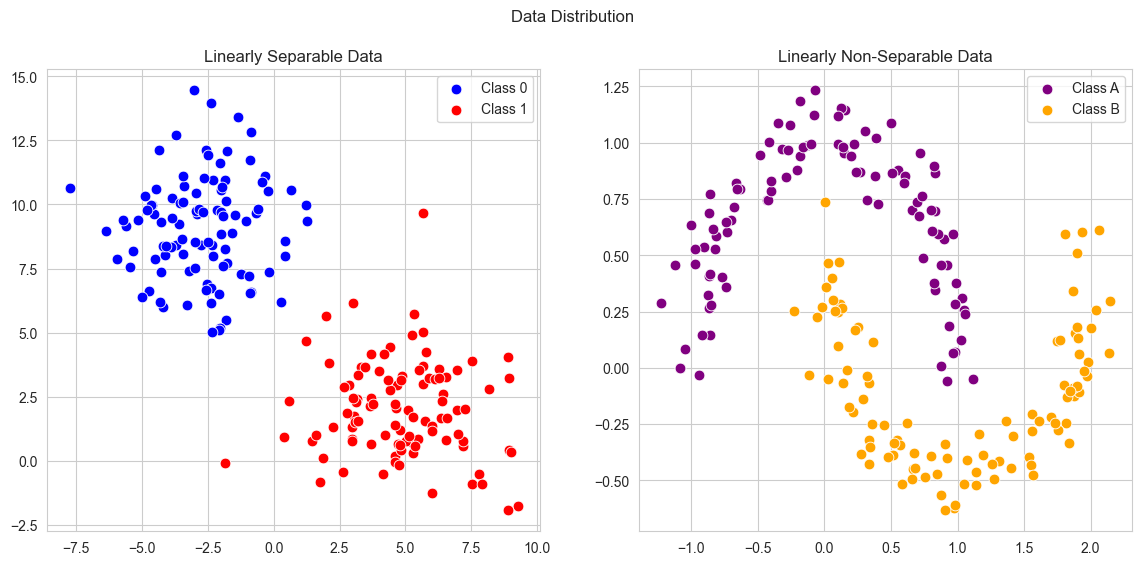

In [3]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Linearly Separable Data
sns.scatterplot(x=X1[y1 == 0][:, 0], y=X1[y1 == 0][:, 1], ax=axes[0], 
                label='Class 0', color='blue', s=60)
sns.scatterplot(x=X1[y1 == 1][:, 0], y=X1[y1 == 1][:, 1], ax=axes[0], 
                label='Class 1', color='red', s=60)
axes[0].set_title('Linearly Separable Data')
axes[0].legend()

# Plot for Linearly Non-Separable Data
sns.scatterplot(x=X2[y2 == 0][:, 0], y=X2[y2 == 0][:, 1], ax=axes[1], 
                label='Class A', color='purple', s=60)
sns.scatterplot(x=X2[y2 == 1][:, 0], y=X2[y2 == 1][:, 1], ax=axes[1], 
                label='Class B', color='orange', s=60)
axes[1].set_title('Linearly Non-Separable Data')
axes[1].legend()

# Set the overall title for the figure
fig.suptitle('Data Distribution')

# Show the plot
plt.show()

## Training the Hard Margin SVM on the separable data

Test Accuracy: 1.00
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Test Confusion Matrix:
[[10  0]
 [ 0 10]]


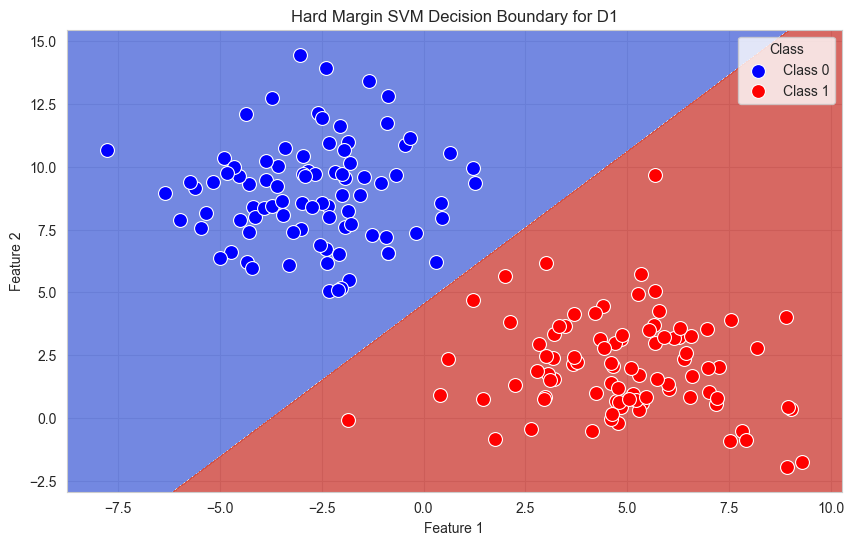

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Train a Hard-Margin SVM
# Setting C to a very large value to enforce a hard margin
svm_hard_margin = SVC(kernel='linear', C=1e10)
svm_hard_margin.fit(X1_train, y1_train)

# Step 2: Evaluate the SVM on the Test Set
y1_pred = svm_hard_margin.predict(X1_test)

# Calculate accuracy
accuracy = accuracy_score(y1_test, y1_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Print classification report
print("Test Classification Report:")
print(classification_report(y1_test, y1_pred))

# Print confusion matrix
print("Test Confusion Matrix:")
print(confusion_matrix(y1_test, y1_pred))



def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    
    # Plot decision boundary
    contour = plt.contourf(xx, yy, Z, alpha=0.8, cmap=sns.color_palette("coolwarm", as_cmap=True))
    
    # Plot data points with color corresponding to their actual class
    sns.scatterplot(x=X[y == 0][:, 0], y=X[y == 0][:, 1], label='Class 0', color='blue', s=100)
    sns.scatterplot(x=X[y == 1][:, 0], y=X[y == 1][:, 1], label='Class 1', color='red', s=100)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Hard Margin SVM Decision Boundary for D1')
    plt.legend(title='Class')
    plt.show()


# Plot the decision boundary
plot_decision_boundary(X1_train, y1_train, svm_hard_margin)

## Training the Soft Margin SVM on the Linearly non-separable data

Test Accuracy: 0.85
Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20

Test Confusion Matrix:
[[8 2]
 [1 9]]


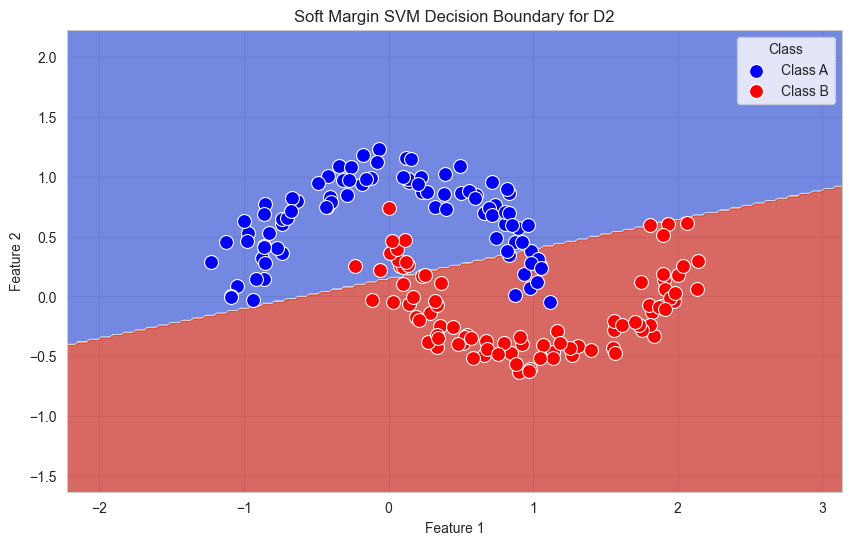

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Train a Soft-Margin SVM
# Setting C to a moderate value to allow some misclassification
svm_soft_margin = SVC(kernel='linear', C=1.0)
svm_soft_margin.fit(X2_train, y2_train)

# Step 2: Evaluate the SVM on the Test Set
y2_pred = svm_soft_margin.predict(X2_test)

# Calculate accuracy
accuracy = accuracy_score(y2_test, y2_pred)
print(f"Test Accuracy: {accuracy:.2f}")




# Print classification report
print("Test Classification Report:")
print(classification_report(y2_test, y2_pred))

print("Test Confusion Matrix:")
print(confusion_matrix(y2_test, y2_pred))


def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    
    # Plot decision boundary
    contour = plt.contourf(xx, yy, Z, alpha=0.8, cmap=sns.color_palette("coolwarm", as_cmap=True))
    
    # Plot data points from class a
    scatter = sns.scatterplot(x=X[y == 0][:, 0], y=X[y == 0][:, 1], color='blue', s=100, label='Class A')

    # Plot data points from class b
    scatter = sns.scatterplot(x=X[y == 1][:, 0], y=X[y == 1][:, 1], color='red', s=100, label='Class B')
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Soft Margin SVM Decision Boundary for D2')
    plt.legend(title='Class')
    plt.show()


# Plot the decision boundary
plot_decision_boundary(X2_train, y2_train, svm_soft_margin)

## Using Multilayer Perceptron on Both Data

**On Data 1**

MLP Results for D1:
Test Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
 [[10  0]
 [ 0 10]]


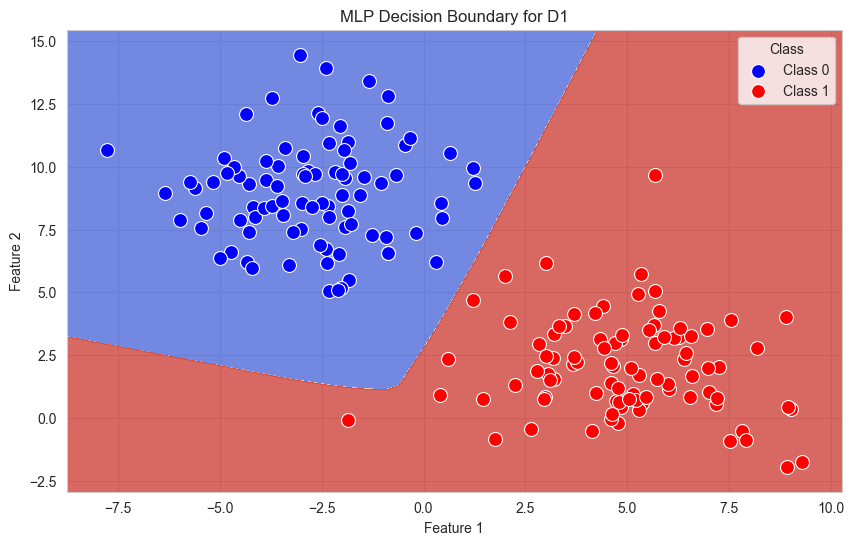

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define the MLP model
mlp_d1 = MLPClassifier(hidden_layer_sizes=(40, 40), max_iter=5000, random_state=42, solver='adam')

# Train the MLP model on D1
mlp_d1.fit(X1_train, y1_train)
y1_pred_mlp = mlp_d1.predict(X1_test)



# Evaluate the MLP model on D1
print("MLP Results for D1:")
print("Test Accuracy:", mlp_d1.score(X1_test, y1_test))
print("Classification Report:\n", classification_report(y1_test, y1_pred_mlp))
print("Confusion Matrix:\n", confusion_matrix(y1_test, y1_pred_mlp))



def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    
    # Plot decision boundary
    contour = plt.contourf(xx, yy, Z, alpha=0.8, cmap=sns.color_palette("coolwarm", as_cmap=True))
    
    # Plot data points from class a
    scatter = sns.scatterplot(x=X[y == 0][:, 0], y=X[y == 0][:, 1], color='blue', s=100, label='Class 0')

    # Plot data points from class b
    scatter = sns.scatterplot(x=X[y == 1][:, 0], y=X[y == 1][:, 1], color='red', s=100, label='Class 1')
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('MLP Decision Boundary for D1')
    plt.legend(title='Class')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X1_train, y1_train, mlp_d1)

**On Data 2**

MLP Results for D2:
Test Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
 [[10  0]
 [ 0 10]]


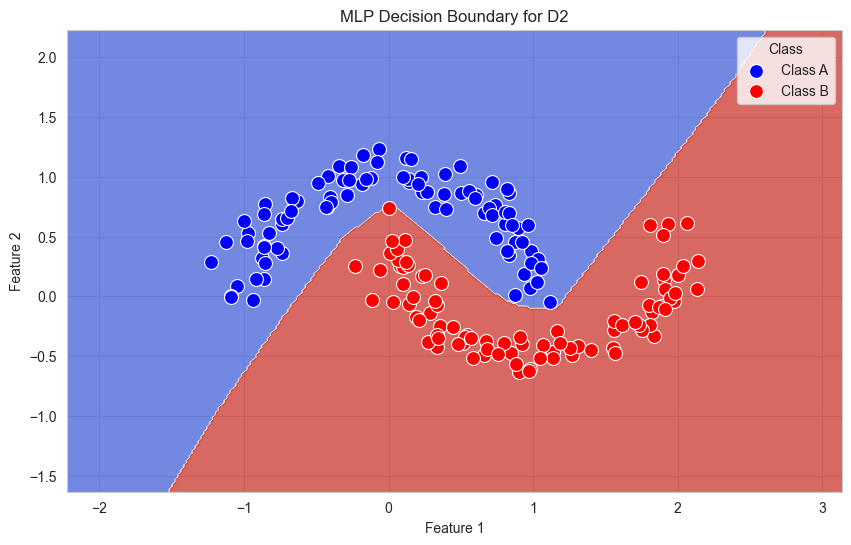

In [7]:
# Define the MLP model
mlp_d2 = MLPClassifier(hidden_layer_sizes=(40, 40), max_iter=5000, random_state=42, solver='adam')

# Train the MLP model on D2
mlp_d2.fit(X2_train, y2_train)
y2_pred_mlp = mlp_d2.predict(X2_test)

# Evaluate the MLP model on D2
print("MLP Results for D2:")
print("Test Accuracy:", mlp_d2.score(X2_test, y2_test))
print("Classification Report:\n", classification_report(y2_test, y2_pred_mlp))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y2_pred_mlp))

# Plot decision boundaries for MLP
def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    
    # Plot decision boundary
    contour = plt.contourf(xx, yy, Z, alpha=0.8, cmap=sns.color_palette("coolwarm", as_cmap=True))
    
    # Plot data points from class a
    scatter = sns.scatterplot(x=X[y == 0][:, 0], y=X[y == 0][:, 1], color='blue', s=100, label='Class A')

    # Plot data points from class b
    scatter = sns.scatterplot(x=X[y == 1][:, 0], y=X[y == 1][:, 1], color='red', s=100, label='Class B')
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('MLP Decision Boundary for D2')
    plt.legend(title='Class')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X2_train, y2_train, mlp_d2)